# Data Cleansing


Import several libraries that will be needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

create a data frame then load the dataset

Here the dataset used is Titanic.csv data

In [2]:
df = pd.read_csv('data/Titanic.csv')

call the top data and this is the view of the dataset that has been loaded

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


check data condition

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Column Age

age column visualization display

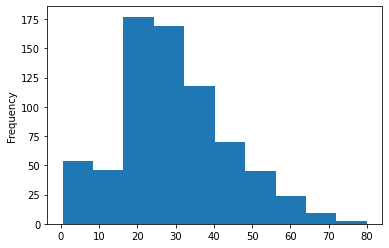

In [5]:
df.Age.plot(kind='hist');

because the Age column has a skewness distribution

then we will do imputation on the Age column using the median

In [6]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

display dataset info to see whether the Age column has been imputed

It turns out that the Age column has now changed its number

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Column Cabin

The total number of data entries is 891, while the Cabin column is 204

This means there is null data in the Cabin column

display the proportions of the Cabin column data

In [8]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

It can be seen that the value column Cabin has too much unique data

and also the Cabin info column is not very informative for knowing Survived data

then we will delete the Cabin column

In [9]:
df.drop('Cabin', axis=1, inplace = True)

display dataset info to see if the Cabin column has been deleted

It turns out that the Cabin column now doesn't appear

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Column Embarked

displays the proportion of Embarked column data

It turns out that the Embarked column data is categorical data

In [11]:
df.Embarked[df.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

if we are going to do imputation on the Embarked column

So we check the Embarked column data type first

Embarked column data is categorical data, so the imputation uses that mode

From the proportion of the Embarked column, S is the data that appears most often, so S is the mode

In [13]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

After imputation, it can be seen that the proportions have changed

In [14]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Column SibSp dan Column Parch

we will carry out data manipulation

manipulation here is not to change data values

but to make it easier for this data to be read by machines

column SibSp (sibling Spouse) means a column that states the number of siblings or number of partners brought by the Passenger

column Parch (Parent Children) means a column that states the number of parents or the number of children brought by the Passenger

we will create a new column that displays whether he is alone or brings his family

In [15]:
df['Alone']=df['SibSp']+df['Parch']

In [17]:
df['Alone'][df['Alone']>0]='With Family'
df['Alone'][df['Alone']==0]='Without Family'

C:\Users\eFishery\AppData\Local\Temp\ipykernel_23012\2874433351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'][df['Alone']>0]='With Family'


displays a display of the latest data

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


# Hubungan Antara Column Sex dan Column Survived

Let's look at the proportion of Column Sex that Survived

In [19]:
df.Sex[df['Survived']==1].value_counts()

female    233
male      109
Name: Sex, dtype: int64

A visualization of the Sex Column that is not Survived appears

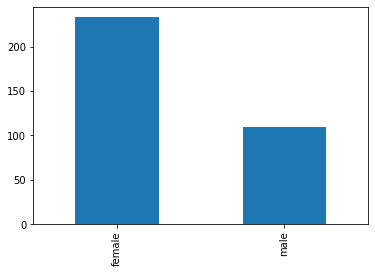

In [20]:
df.Sex[df['Survived']==1].value_counts().plot(kind='bar');

kita bandingkan dengan column Sex yg tidak survived

In [21]:
df.Sex[df['Survived']==0].value_counts()

male      468
female     81
Name: Sex, dtype: int64

tampilkan visualisasi Column Sex yang tidak Survived

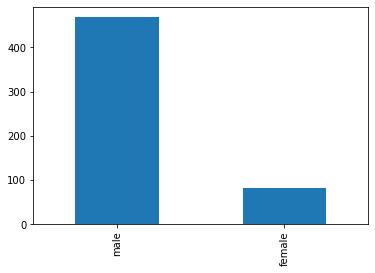

In [22]:
df.Sex[df['Survived']==0].value_counts().plot(kind='bar');

# Pivot

In [23]:
def make_pivot(param1, param2):     
    df_slice = df[[param1, param2, 'PassengerId']]     
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)     
    p_chart = slice_pivot.plot(kind='bar');     
    for p in p_chart.patches:         
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))     
        return slice_pivot     
        return p_chart

# Pivot Antara Column Sex dan Column  Survived

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

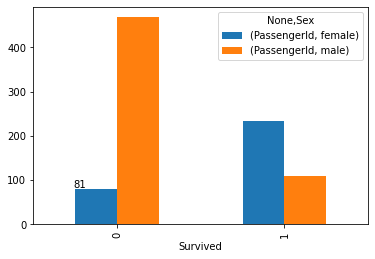

In [24]:
make_pivot('Survived', 'Sex')

# Sekian